## This Model Compared Custom Model with Pretrained Deep Learning Models such as:
- VGG16
- ResNet50
- MobileNetV2

In [6]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# Importing Libraries

In [11]:
# import necassary libraries

import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
import zipfile
import os
from pathlib import Path

In [12]:
# Check GPU Availability
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [13]:
# Set Hyperparameters
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS = 3
EPOCHS = 30

In [49]:
# Extract Dataset
ZIP_FILE = "drive/MyDrive/Disease_Detection/PlantVillage.zip"
EXTRACT_PATH = Path("drive/MyDrive/Disease_Detection/dataset")

with zipfile.ZipFile(ZIP_FILE, 'r') as zip_ref:
    zip_ref.extractall(EXTRACT_PATH)

In [50]:
%ls drive/MyDrive/Disease_Detection/dataset/PlantVillage/

Potato___Early_blight/  Potato___healthy/  Potato___Late_blight/


In [48]:
%ls drive/MyDrive/Disease_Detection/


 CNN_potato1.ipynb    CNN_tomato.ipynb  'Potato Disease Detection Transfomer.ipynb'
 CNN_potato_2.ipynb   GitHub.txt
 CNN_potato.ipynb     PlantVillage.zip


In [57]:
# Load and Preprocess Dataset with Data Augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2),
])

datagen = tf.keras.preprocessing.image.ImageDataGenerator(validation_split=0.2, rescale=1./255)

train_data = datagen.flow_from_directory(
    EXTRACT_PATH/"PlantVillage",
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    EXTRACT_PATH/"PlantVillage",
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 1722 images belonging to 3 classes.
Found 430 images belonging to 3 classes.


In [66]:
train_data.num_classes

3

# Building a Custom CNN Model

In [58]:
# Build Custom CNN Model
custom_model = models.Sequential([
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(train_data.num_classes, activation='softmax')
])

In [59]:
custom_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_4 (Sequential)            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [60]:
custom_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [62]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,          # Stop after 5 epochs of no improvement
    restore_best_weights=True  # Restore best model weights
)

# Apply it during training

# Train Custom CNN

custom_history = custom_model.fit(
    train_data,
    validation_data=val_data,
    epochs=EPOCHS,
    callbacks=[early_stopping]  # Add the callback
)

Epoch 1/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 12s 214ms/step - accuracy: 0.9667 - loss: 0.0808 - val_accuracy: 0.9651 - val_loss: 0.1153
Epoch 2/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 200ms/step - accuracy: 0.9753 - loss: 0.0883 - val_accuracy: 0.9209 - val_loss: 0.1744
Epoch 3/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 205ms/step - accuracy: 0.9723 - loss: 0.0590 - val_accuracy: 0.9558 - val_loss: 0.1134
Epoch 4/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 12s 213ms/step - accuracy: 0.9837 - loss: 0.0418 - val_accuracy: 0.9558 - val_loss: 0.1172
Epoch 5/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 12s 213ms/step - accuracy: 0.9826 - loss: 0.0628 - val_accuracy: 0.9326 - val_loss: 0.1591
Epoch 6/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 20s 208ms/step - accuracy: 0.9892 - loss: 0.0284 - val_accuracy: 0.9349 - val_loss: 0.1939
Epoch 7/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 201ms/step - accuracy: 0.9701 - loss: 0.0702 - val_accuracy: 0.9512 - val_loss: 0.1238
Epoch 8/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 201ms/step - accuracy: 0.9894 - loss: 0.0313 - val_accu

# Implement Pretrained Models


In [64]:
# Implement Pretrained Models
def create_pretrained_model(base_model):
    base_model.trainable = False
    model = models.Sequential([
        data_augmentation,
        base_model,
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(train_data.num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


pretrained_models = {
    "VGG16": tf.keras.applications.VGG16(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3), include_top=False, weights='imagenet'),
    "ResNet50": tf.keras.applications.ResNet50(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3), include_top=False, weights='imagenet'),
    "MobileNetV2": tf.keras.applications.MobileNetV2(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3), include_top=False, weights='imagenet')
}

pretrained_histories = {}


for name, base_model in pretrained_models.items():
    model = create_pretrained_model(base_model)
    print(f"Training {name} model...")

    history = model.fit(
        train_data,
        validation_data=val_data,
        epochs=EPOCHS,
        callbacks=[early_stopping]  # Add callback
    )

    pretrained_histories[name] = history


<ipython-input-64-ae2bfd30b89f>:18: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  "MobileNetV2": tf.keras.applications.MobileNetV2(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3), include_top=False, weights='imagenet')


Training VGG16 model...
Epoch 1/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 18s 282ms/step - accuracy: 0.6567 - loss: 1.9138 - val_accuracy: 0.7488 - val_loss: 0.6779
Epoch 2/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 13s 231ms/step - accuracy: 0.8840 - loss: 0.3130 - val_accuracy: 0.9070 - val_loss: 0.2240
Epoch 3/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 12s 229ms/step - accuracy: 0.9523 - loss: 0.1411 - val_accuracy: 0.8837 - val_loss: 0.2790
Epoch 4/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 13s 230ms/step - accuracy: 0.9381 - loss: 0.1492 - val_accuracy: 0.9047 - val_loss: 0.2437
Epoch 5/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 15s 269ms/step - accuracy: 0.9289 - loss: 0.2038 - val_accuracy: 0.9000 - val_loss: 0.2690
Epoch 6/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 12s 227ms/step - accuracy: 0.9116 - loss: 0.2003 - val_accuracy: 0.9302 - val_loss: 0.1569
Epoch 7/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 12s 224ms/step - accuracy: 0.9595 - loss: 0.1098 - val_accuracy: 0.9535 - val_loss: 0.1244
Epoch 8/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 15s 271ms/step - accuracy: 0.9571 -

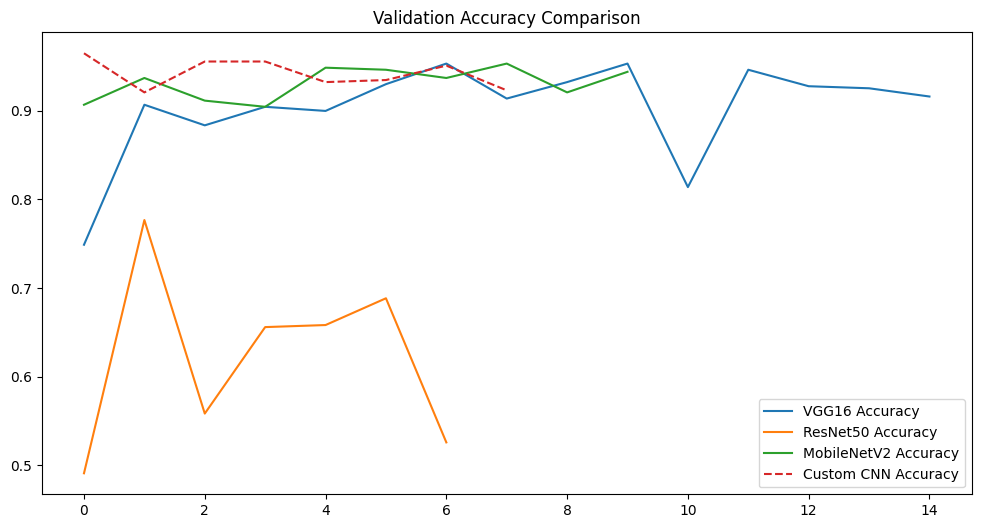

In [65]:
# Compare Model Performance
plt.figure(figsize=(12, 6))
for name, history in pretrained_histories.items():
    plt.plot(history.history['val_accuracy'], label=f'{name} Accuracy')
plt.plot(custom_history.history['val_accuracy'], label='Custom CNN Accuracy', linestyle='dashed')
plt.legend()
plt.title("Validation Accuracy Comparison")
plt.show()

### **Interpreting the Validation Accuracy Comparison Graph**  


#### **a) Overall Performance of Each Model**
- **MobileNetV2 (Green Line)** and **Custom CNN (Red Dashed Line)** show the highest and most stable validation accuracy.
- **VGG16 (Blue Line)** performs well but has **fluctuations**.
- **ResNet50 (Orange Line)** shows **poor validation accuracy**, indicating underfitting.

#### **b) MobileNetV2 vs. Custom CNN**
- Both **MobileNetV2** and **Custom CNN** maintain **high accuracy (~90% or more)**.
- The **Custom CNN** starts with high accuracy and maintains stability.
- **MobileNetV2** has some slight variations but stays consistently high.

#### **c) VGG16 Accuracy Trends**
- Starts at around **75%** and gradually increases.
- Peaks above **90%**, but fluctuates towards the end.

#### **d) ResNet50 Underperformance**
- Starts with **very low accuracy (~50%)**.
- Shows instability and struggles to improve.
- Likely **not learning features effectively** for this dataset.

